# **PREPROCESSING: FEATURE SELECTION**

In [378]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load Dataset

In [379]:
df_adult = pd.read_csv('adult.csv')
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Missing Value

In [380]:
df_adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [381]:
# ubah '?' menjadi NaN
df_adult.replace('?', np.nan, inplace=True)

In [382]:
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [383]:
df_adult.isna().sum() / df_adult.shape[0] * 100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

## Data Splitting

In [384]:
df_adult['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [385]:
df_adult['income'] = np.where(df_adult['income']=='<=50K', 0, 1)
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [386]:
# define X & y 

X = df_adult.drop(columns=['income', 'fnlwgt', 'education'])
y = df_adult['income']

In [387]:
# data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=10)

In [388]:
X_train.shape

(26048, 12)

## Preprocessing

**Preprocess scheme:**
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size


In [389]:
X_train.describe(include='object')

,workclass,marital.status,occupation,relationship,race,sex,native.country
count,24566,26048,24563,26048,26048,26048,25586
unique,8,7,14,6,5,2,41
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,18218,11993,3310,10576,22295,17376,23339


In [390]:
df_adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [391]:
# pipeline untuk impute categorical feature kemudian binary encoding
imp_binary = Pipeline([
    ('imp_contant', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('binary', ce.BinaryEncoder())
])

# column transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary', imp_binary, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

In [392]:
# column transformer
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [393]:
X_train_prep.shape

(26048, 36)

In [394]:
# scaling
scaler = RobustScaler()

X_train_prep_scaled = scaler.fit_transform(X_train_prep)
X_test_prep_scaled = scaler.transform(X_test_prep)

# X_train_prep_scaled

In [395]:
feat_onehot = list(transformer.transformers_[0][1].get_feature_names())

feat_binary = list(transformer.transformers_[1][1][1].get_feature_names())

feat_numerical = list(X_train.columns[transformer.transformers_[2][2]])

# menyatukan nama-nama features
features = feat_onehot + feat_binary + feat_numerical
# feature

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [396]:
# array to dataframe
X_train_prep_scaled = pd.DataFrame(X_train_prep_scaled)
X_test_prep_scaled = pd.DataFrame(X_test_prep_scaled)

# memasukkan nama feature ke dalam dataframe
X_train_prep_scaled.columns = features
X_test_prep_scaled.columns = features

X_train_prep_scaled.head()

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.10,2.000000,99999.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.80,0.000000,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,-0.333333,0.0,0.0,0.6
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.25,1.000000,0.0,0.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.60,-2.000000,0.0,0.0,0.0


In [397]:
X_train_prep_scaled.columns

Index(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child', 'x0_Unmarried',
       'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black', 'x1_Other', 'x1_White',
       'x2_Male', '0_0', '0_1', '0_2', '0_3', '0_4', '1_0', '1_1', '1_2',
       '1_3', '2_0', '2_1', '2_2', '2_3', '2_4', '3_0', '3_1', '3_2', '3_3',
       '3_4', '3_5', '3_6', 'age', 'education.num', 'capital.gain',
       'capital.loss', 'hours.per.week'],
      dtype='object')

## Feature Selection: Filter Method (Univariate Statistics)

In [398]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif

In [399]:
X_train_prep_scaled.shape

(26048, 36)

In [400]:
# Memilih 50% feature dari dataset

select = SelectPercentile(percentile=50, score_func=f_classif)

# fitting
select.fit(X_train_prep_scaled, y_train)

# transform
X_train_select = select.transform(X_train_prep_scaled)
X_test_select = select.transform(X_test_prep_scaled)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10 15 19 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [401]:
print('Before selection: ', X_train_prep_scaled.shape)
print('After selection: ', X_train_select.shape)

Before selection:  (26048, 36)
After selection:  (26048, 18)


In [402]:
# Feature selected
mark = select.get_support()
mark

array([ True, False,  True,  True,  True, False,  True, False, False,
        True, False, False, False,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True])

In [403]:
selected_features = pd.DataFrame({
    'feature': features,
    'selected': mark
})

selected = selected_features[selected_features['selected']==True]
selected

,feature,selected
0,x0_Not-in-family,True
2,x0_Own-child,True
3,x0_Unmarried,True
4,x0_Wife,True
6,x1_Black,True
9,x2_Male,True
13,0_3,True
16,1_1,True
17,1_2,True
18,1_3,True


## Modeling with All Features

In [404]:
model = LogisticRegression(max_iter=500)

model.fit(X_train_prep_scaled, y_train)

y_pred = model.predict(X_test_prep_scaled)

accuracy_score(y_test, y_pred)

0.8507600184246891

## Modeling with Selected Features

In [405]:
model = LogisticRegression(max_iter=500)

model.fit(X_train_select, y_train)

y_pred = model.predict(X_test_select)

accuracy_score(y_test, y_pred)

0.8496852448948258

**Kesimpulan**
 
- Dengan melakukan feature selection, kita mengurangi jumlah feature dari yang awalnya berjumlah 36 features menjadi 18 feature.
- Performa model tidak meningkat (menurun sedikit)
- Tapi dengan berkurangnya 18 feature, fitting model menjadi lebih cepat.
- Model lebih general (mengurangi overfitting)

## Model Properties

In [406]:
model.coef_[0]

array([-4.36736392e-01, -9.07175390e-01, -7.11162337e-01,  9.73197855e-01,
       -1.48143821e-01,  6.10635708e-01, -8.88636238e-02, -1.19180738e+00,
       -9.79321920e-01,  7.63714364e-01, -5.66508240e-01, -8.21049991e-01,
       -2.07781201e-02,  5.27093890e-01,  8.67125547e-01,  3.18540394e-04,
        6.23386613e-04,  1.61441331e-01])

In [407]:
# selected['feature']

In [408]:
model_coef = pd.DataFrame({
    'feature': selected['feature'],
    'coef': model.coef_[0]
}).sort_values('coef')

model_coef

,feature,coef
16,1_1,-1.191807
17,1_2,-0.979322
2,x0_Own-child,-0.907175
21,2_2,-0.821050
3,x0_Unmarried,-0.711162
20,2_1,-0.566508
0,x0_Not-in-family,-0.436736
6,x1_Black,-0.148144
13,0_3,-0.088864
23,2_4,-0.020778


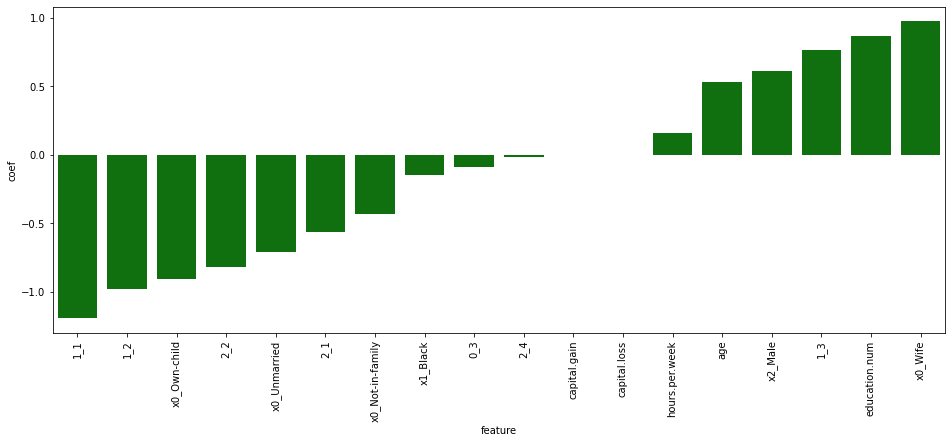

In [409]:
plt.figure(figsize=(16, 6))
sns.barplot(data=model_coef, x='feature', y='coef', color='g')
plt.xticks(rotation=90);

## Feature Selection: Model Based

In [410]:
# feature
X_train_model_based = X_train_prep_scaled.drop(columns=['capital.gain', 'capital.loss', 'hours.per.week', '2_4', '0_3'])
X_test_model_based = X_test_prep_scaled.drop(columns=['capital.gain', 'capital.loss', 'hours.per.week', '2_4', '0_3'])

In [411]:
model = LogisticRegression(max_iter=500)

model.fit(X_train_model_based, y_train)

y_pred = model.predict(X_test_model_based)

accuracy_score(y_test, y_pred)

0.8311070167357593

- Setelah melakukan modeling dengan Logistic Regression, kita mengurangi feature dari 18 menjadi 13 feature berdasarkan coefnya.
- Performa model menurun dari akurasi 84.9% menjadi 83.1%
- Model semakin cepat dalam fitting dan mengurangi overfitting

## Filter Method

In [412]:
df = pd.read_csv('santander_satisfaction.csv', nrows=20000)
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40055,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
19996,40058,2,25,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86339.040000,0
19997,40059,2,24,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74521.200000,0
19998,40065,2,73,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138092.430000,0


In [413]:
df['TARGET'].value_counts()

0    19187
1      813
Name: TARGET, dtype: int64

### Missing Value Percentage

In [414]:
df_missing = df.isna().sum().to_frame().sort_values(0) / df.shape[0]*100
df_missing

,0
ID,0.0
imp_venta_var44_ult1,0.0
imp_venta_var44_hace3,0.0
imp_trasp_var33_out_ult1,0.0
imp_trasp_var33_out_hace3,0.0
...,...
num_var25,0.0
num_var25_0,0.0
num_var26,0.0
num_op_var41_ult1,0.0


In [415]:
df_missing[df_missing[0]>90]

,0


Tidak ada kolom yang missing valuenya lebih dari 90 %

### Low Variance

In [416]:
# define x dan y
X = df.drop(columns='TARGET') 
y = df['TARGET']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=10)

In [417]:
from sklearn.feature_selection import VarianceThreshold

In [418]:
# define filter
constant_filter = VarianceThreshold(threshold=0)

# fit
constant_filter.fit(X_train)

# transform
X_train_filtered = constant_filter.transform(X_train)
X_test_filtered = constant_filter.transform(X_test)

In [419]:
print('before filtering', X_train.shape)
print('after filtering', X_train_filtered.shape)


before filtering (15000, 370)
after filtering (15000, 301)


In [420]:
# constant_filter.get_support()

In [421]:
constant_features = [not i for i in constant_filter.get_support()]
# constant_features

In [422]:
constant_features = [not i for i in constant_filter.get_support()]

X_train_df = pd.DataFrame(X_train)
X_train_df.columns[constant_features]

# inilah 69 kolom yang nilai variancenya = 0
# 69 feture ini tidak dibutuhkan dalam modeling

Index(['ind_var2_0', 'ind_var2', 'ind_var18_0', 'ind_var18', 'ind_var27_0',
       'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var34_0', 'ind_var34',
       'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var18_0', 'num_var18',
       'num_op_var40_hace3', 'num_var27_0', 'num_var28_0', 'num_var28',
       'num_var27', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var18', 'saldo_var28', 'saldo_var27', 'saldo_var34',
       'saldo_var41', 'saldo_var46', 'delta_imp_amort_var18_1y3',
       'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var17_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'imp_amort_var18_hace3',
       'imp_amort_var18_ult1', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1',
       'imp_var7_emit_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3',
       'imp_reemb_var17_ult1', 'imp_reemb_var33_hace3',

In [423]:
for i in X_train_df.columns[constant_features]:
    print(X_train_df[i].value_counts())

0    15000
Name: ind_var2_0, dtype: int64
0    15000
Name: ind_var2, dtype: int64
0    15000
Name: ind_var18_0, dtype: int64
0    15000
Name: ind_var18, dtype: int64
0    15000
Name: ind_var27_0, dtype: int64
0    15000
Name: ind_var28_0, dtype: int64
0    15000
Name: ind_var28, dtype: int64
0    15000
Name: ind_var27, dtype: int64
0    15000
Name: ind_var34_0, dtype: int64
0    15000
Name: ind_var34, dtype: int64
0    15000
Name: ind_var41, dtype: int64
0    15000
Name: ind_var46_0, dtype: int64
0    15000
Name: ind_var46, dtype: int64
0    15000
Name: num_var18_0, dtype: int64
0    15000
Name: num_var18, dtype: int64
0    15000
Name: num_op_var40_hace3, dtype: int64
0    15000
Name: num_var27_0, dtype: int64
0    15000
Name: num_var28_0, dtype: int64
0    15000
Name: num_var28, dtype: int64
0    15000
Name: num_var27, dtype: int64
0    15000
Name: num_var34_0, dtype: int64
0    15000
Name: num_var34, dtype: int64
0    15000
Name: num_var41, dtype: int64
0    15000
Name: num_var46_0, 

### Duplicate Feature

In [424]:
# kolom jadi baris
X_train_transpose = X_train_filtered.T
X_test_transpose = X_test_filtered.T

X_train_transpose.shape

(301, 15000)

In [425]:
X_train_transpose = pd.DataFrame(X_train_transpose)
X_test_transpose = pd.DataFrame(X_test_transpose)

In [426]:
duplicate_feature = X_train_transpose.duplicated()

list_duplicate = []

for index, feature in enumerate(duplicate_feature):
    if feature == True:
        list_duplicate.append(index)

# ini adalah feature yang duplikat
list_duplicate

[36,
 50,
 52,
 53,
 54,
 61,
 66,
 68,
 69,
 71,
 91,
 102,
 104,
 113,
 116,
 117,
 123,
 129,
 131,
 132,
 134,
 154,
 160,
 174,
 177,
 178,
 179,
 180,
 283]

In [427]:
pd.DataFrame(X_train_filtered).iloc[: , list_duplicate]

,36,50,52,53,54,61,66,68,69,71,...,132,134,154,160,174,177,178,179,180,283
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exercise: Feature Selection

- Gunakan dataset dari sklearn.datasets.load_diabetes
- Target: nilai progresi penyakit diabetes dalam 1 tahun
- Lakukan prediksi dengan melakukan feature selection terlebih dahulu
    - Percobaan 1: Tanpa feature selection
    - Percobaan 2: Gunakan metode filtering
    - Percobaan 3: Gunakan metode model based
- Bandingkan mana yang lebih baik

In [471]:
from sklearn.datasets import load_diabetes

In [494]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [473]:
# features
df = pd.DataFrame(data=load_diabetes().data, columns=load_diabetes().feature_names)

# target
df['target'] = load_diabetes().target

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [474]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


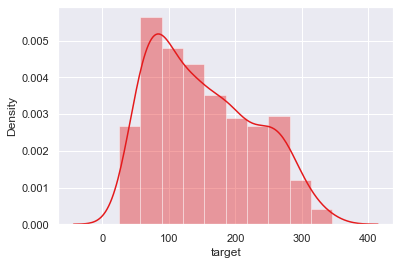

In [475]:
sns.distplot(df['target']);

### Data Splitting

In [476]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

### Modeling All Features

In [477]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error

In [478]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

63.08404648380539

### Modeling with Selected Features (Filter Method)

In [481]:
# for i in range(1, len(X_train.columns)):
#     print(i)

In [482]:
from sklearn.feature_selection import f_regression

score = []
names = []

for i in range(1, len(X_train.columns)+1):

    # select best features
    select = SelectKBest(k=i, score_func=f_regression)
    select.fit(X_train, y_train)

    X_train_selected = select.transform(X_train)
    X_test_selected = select.transform(X_test)


    # modeling
    lasso = Lasso()
    lasso.fit(X_train_selected, y_train)

    y_pred_selected = lasso.predict(X_test_selected)
    rmse = mean_squared_error(y_test, y_pred_selected, squared=False)
    score.append(rmse)

    # selected features
    feat_name = select.get_feature_names_out()
    names.append(feat_name)

# print(score)
# print(names)

In [483]:
feat_kbest = pd.DataFrame({
    'RMSE':score,
    'features': names
})

feat_kbest

,RMSE,features
0,66.648908,[bmi]
1,63.127202,"[bmi, s5]"
2,63.127215,"[bmi, s4, s5]"
3,63.084049,"[bmi, bp, s4, s5]"
4,63.084046,"[bmi, bp, s3, s4, s5]"
5,63.084046,"[bmi, bp, s3, s4, s5, s6]"
6,63.084046,"[age, bmi, bp, s3, s4, s5, s6]"
7,63.084046,"[age, bmi, bp, s1, s3, s4, s5, s6]"
8,63.084046,"[age, bmi, bp, s1, s2, s3, s4, s5, s6]"
9,63.084046,"[age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]"


- Score RMSE terbaik (paling kecil) yaitu 63.084046 dengan menggunakan 5 sampai 10 features
- Jadi lebih baik menggunakan 5 feature, karena dengan feature yang sedikit bisa mendapatkan performa model yang sama dengan saat menggunakan 10 features.
- 5 features tesrsebut adalah: [bmi, bp, s3, s4, s5]

### Modeling with Selected Features (Model Based Method)

**Menggunakan alpha=1**

In [496]:
from sklearn.linear_model import Ridge

In [499]:
model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

63.08404648380539

In [500]:
model_coef = pd.DataFrame({
    'coef': model.coef_
}, index=list(X_train),).sort_values('coef')

model_coef

,coef
age,0.000000
sex,0.000000
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s6,0.000000
bp,5.750195
s5,312.255542
bmi,347.553170


<AxesSubplot:>

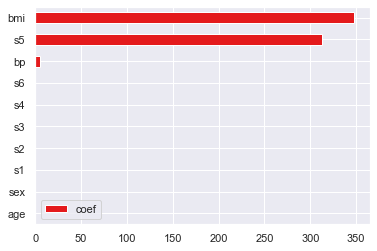

In [ ]:
model_coef.plot(kind='barh')

In [ ]:
# Lasso dengan hanya menggunakan 3 features
lasso = Lasso()
lasso.fit(X_train[['bmi','s5','bp']], y_train)

y_pred = lasso.predict(X_test[['bmi','s5','bp']])
mean_squared_error(y_test, y_pred, squared=False)

63.08416118426131

**Mencari alpha terbaik**

In [484]:
# Lasso

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
training_rmse = []
testing_rmse = []

score = 0

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train, y_train)
    
    y_pred_train = lasso.predict(X_train)
    rmse_train = mean_squared_error(y_train, y_pred_train)**0.5
    training_rmse.append(rmse_train)
    
    y_pred_test = lasso.predict(X_test)
    rmse_score = mean_squared_error(y_test, y_pred_test)**0.5
    testing_rmse.append(rmse_score)
    
    if i==0:
        score = rmse_score
        best_alpha = alpha[i]
        
    if score > rmse_score:
        score = rmse_score
        best_alpha = alpha[i]

print('Best alpha', best_alpha)
print('RMSE', score)

Best alpha 0.0001
RMSE 53.963200114559946


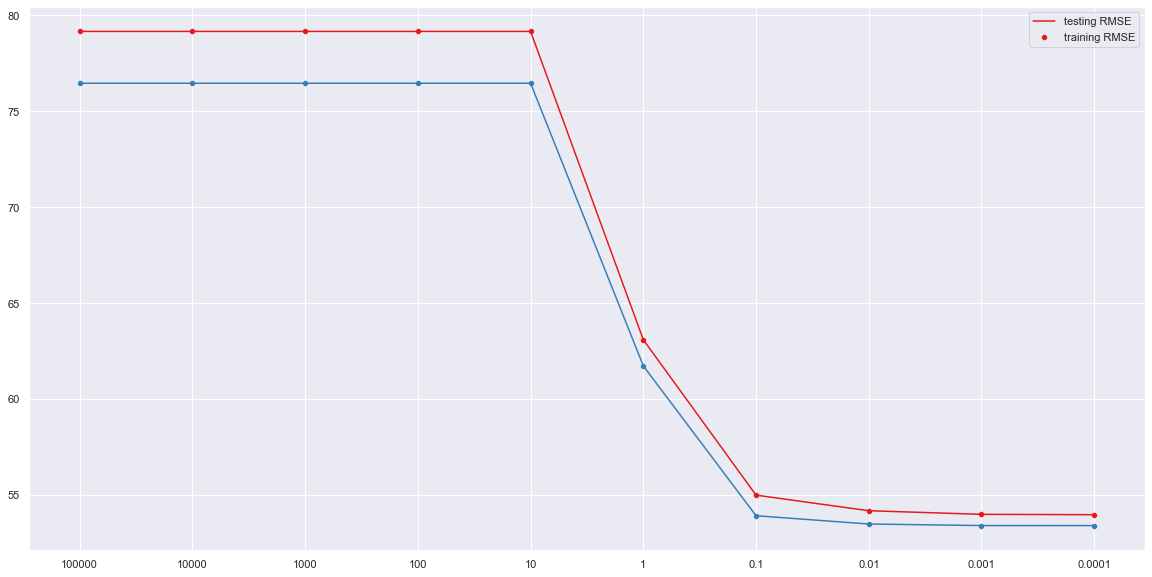

In [485]:
# Plot the alphas
sns.set(palette='Set1')
length = range(len(alpha))

plt.figure(figsize = (20,10))

sns.lineplot(x=length, y=testing_rmse)
sns.scatterplot(x=length, y=testing_rmse)

sns.lineplot(x=length, y=training_rmse)
sns.scatterplot(x=length,  y=training_rmse)

plt.legend(['testing RMSE', 'training RMSE'])
plt.xticks(length, alpha);

In [486]:
pd.DataFrame({
    'alpha': alpha,
    'train RMSE': training_rmse,
    'test RMSE': testing_rmse
})

,alpha,train RMSE,test RMSE
0,100000.0000,76.457965,79.160372
1,10000.0000,76.457965,79.160372
2,1000.0000,76.457965,79.160372
3,100.0000,76.457965,79.160372
4,10.0000,76.457965,79.160372
5,1.0000,61.719979,63.084046
6,0.1000,53.909029,54.982654
7,0.0100,53.477225,54.170707
8,0.0010,53.396817,53.981152
9,0.0001,53.395011,53.963200


In [487]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

53.963200114559946

In [488]:
lasso.coef_

array([  -3.76351056, -225.51456036,  517.97071071,  328.19612801,
       -720.39967859,  405.79457747,   77.00898191,  216.92153879,
        701.75367748,   40.01219739])

In [489]:
model_coef = pd.DataFrame({
    'coef': lasso.coef_
}, index=list(X_train),).sort_values('coef')

model_coef

,coef
s1,-720.399679
sex,-225.514560
age,-3.763511
s6,40.012197
s3,77.008982
s4,216.921539
bp,328.196128
s2,405.794577
bmi,517.970711
s5,701.753677


<AxesSubplot:>

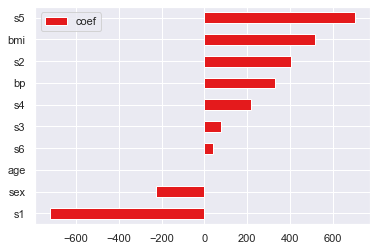

In [490]:
model_coef.plot(kind='barh')